## 라이브러리 호출하기

In [21]:
!pip3 install torch torchvision torchaudio
!pip install torchvision

import numpy as np
import matplotlib.pyplot as plt
import os

#토치 라이브러리 불러오기 
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from utils import label_map_util


import torchvision as torchvision
import torchvision.transforms as transforms #------ 데이터 전처리를 위해 사용하는 라이브러리
from torch.utils.data import Dataset, DataLoader #torch.utils.data
print(torchvision)

ModuleNotFoundError: No module named 'utils'

## CPU나 GPU 장치 확인해야 정상적으로 파이토치 실행 가능 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
## fashion_mnist 데이터셋 내려받기 
train_dataset = torchvision.datasets.FashionMNIST("../PythonImageWorkspace/Fashion_MNIST_Data", download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test_dataset = torchvision.datasets.FashionMNIST("../PythonImageWorkspace/Fashion_MNIST_Data", download=True,
                       train=False,transform=transforms.Compose([transforms.ToTensor()])) #train=False 은 test 데이터값들만 내려받겠다는 의미



100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:08<00:00, 3080179.35it/s]


Extracting ../PythonImageWorkspace/Fashion_MNIST_Data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../PythonImageWorkspace/Fashion_MNIST_Data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 105415.21it/s]


Extracting ../PythonImageWorkspace/Fashion_MNIST_Data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../PythonImageWorkspace/Fashion_MNIST_Data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:02<00:00, 1548596.30it/s]


Extracting ../PythonImageWorkspace/Fashion_MNIST_Data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../PythonImageWorkspace/Fashion_MNIST_Data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 1289322.09it/s]


Extracting ../PythonImageWorkspace/Fashion_MNIST_Data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../PythonImageWorkspace/Fashion_MNIST_Data\FashionMNIST\raw



In [19]:
# 데이터로더 : fashionmnist 데이터를 메모리로 보내주는 친구
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)




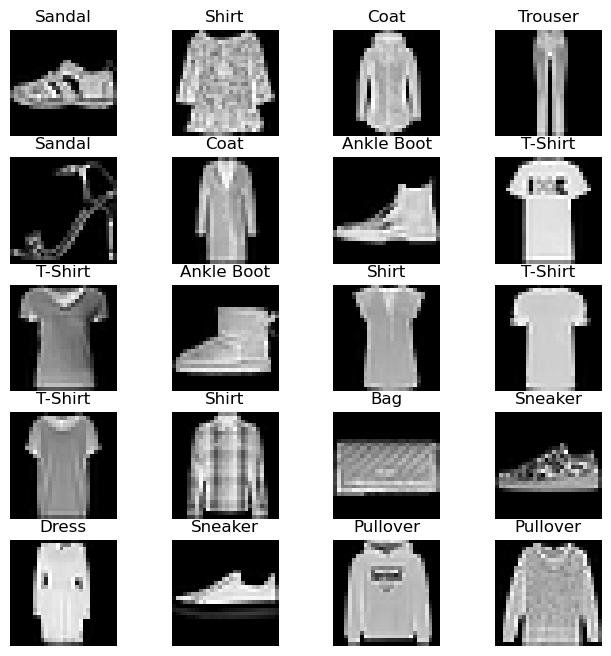

In [22]:
# 20개의 이미지를 레이블 정보와 함께 출력하기 (이때 레이블은 'T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' 등 열 개의 클래스로 구성됨)

labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'} #------ 열 개의 클래스

fig = plt.figure(figsize=(8,8)) #이미지 출력해주는 것이 figure이고, figsize=(가로 길이, 세로 길이)
columns =4;
rows = 5;
for i in range(1, columns*rows+1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show() #20개의 이미지 데이터를 시각적으로 표현한다. 


## 합성곱 신경망과의 비교를 위하여 심층 신경망 모델 먼저 생성해보기


In [23]:
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features= 784, out__features=256)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
        
    def forward(alwd, ) 